<a href="https://colab.research.google.com/github/Vikasini2406/pp-III/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Classification
##### Dataset Link - https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
#### Xception
#### ResNet152V2
#### InceptionResnetV2

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import joblib
%matplotlib inline

In [2]:
training_images = []
training_labels = []

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
TRAINING_PATH = "/content/drive/MyDrive/dataset/Training"
TESTING_PATH = "/content/drive/MyDrive/dataset/Testing"

training_images = []
training_labels = []

for i in os.listdir(TRAINING_PATH):
  class_name = i
  class_path = os.path.join(TRAINING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path = os.path.join(class_path, j)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (128,128))
    training_images.append(img_resized)
    training_labels.append(class_name)

for i in os.listdir(TESTING_PATH):
  class_name = i
  class_path = os.path.join(TESTING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path = os.path.join(class_path, j)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (128,128))
    training_images.append(img_resized)
    training_labels.append(class_name)

In [5]:
training_images = np.array(training_images)
training_labels = np.array(training_labels)

In [6]:
print(training_images.shape)
print(training_labels.shape)

(3264, 128, 128, 3)
(3264,)


In [7]:
training_images = training_images / 255.0

In [8]:
x_train, x_val, y_train, y_val = train_test_split(training_images, training_labels, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=4)

In [11]:
del training_images
del training_labels

## Xception

In [12]:
xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
    pooling="avg",
    classes=4,
)

In [13]:
for layer in xception.layers:
  layer.trainable = False

In [14]:
model_0 = tf.keras.models.Sequential()
model_0.add(xception)

model_0.add(tf.keras.layers.Flatten())
model_0.add(tf.keras.layers.Dropout(0.5))
model_0.add(tf.keras.layers.Dense(4, activation="softmax"))

In [15]:
model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [16]:
history = model_0.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 60
)

Epoch 1/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 54s 511ms/step - accuracy: 0.4321 - loss: 1.2648 - val_accuracy: 0.7000 - val_loss: 0.7479
Epoch 2/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.7096 - loss: 0.7633 - val_accuracy: 0.7418 - val_loss: 0.6635
Epoch 3/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.7255 - loss: 0.6987 - val_accuracy: 0.7694 - val_loss: 0.6033
Epoch 4/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.7622 - loss: 0.6149 - val_accuracy: 0.7888 - val_loss: 0.5718
Epoch 5/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.7832 - loss: 0.5639 - val_accuracy: 0.7990 - val_loss: 0.5537
Epoch 6/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8029 - loss: 0.5479 - val_accuracy: 0.7908 - val_loss: 0.5314
Epoch 7/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7908 - loss: 0.5374 - val_accuracy: 0.7929 - val_loss: 0.5149
Epoch 8/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8103 - loss: 0.5019 - val_accuracy: 0.8051 

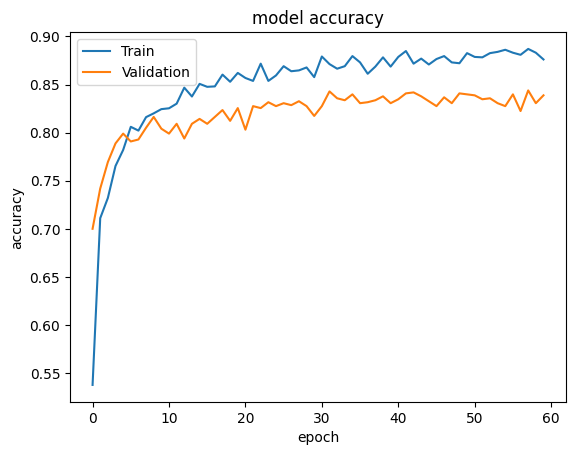

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("xception_without_data_augmentation_accuracy.png")
plt.show()

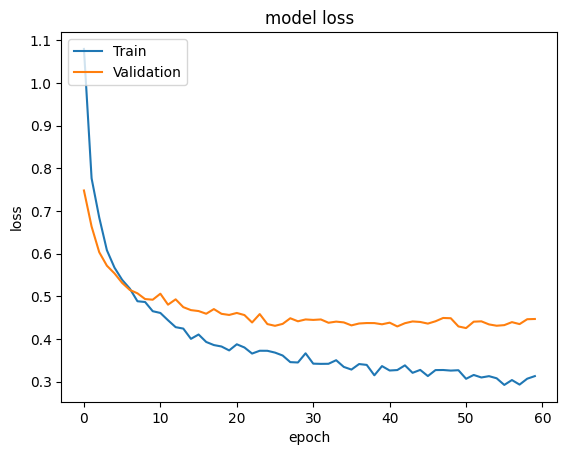

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("xception_without_data_augmentation_loss.png")
plt.show()

In [19]:
model_0.save("/content/xception_without_data_augmentation.h5")

In [20]:
del xception

## Resnet152V2

In [21]:
resnet152v2 = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
    pooling="avg",
    classes=4,
)

In [22]:
for layer in resnet152v2.layers:
  layer.trainable = False

In [23]:
model_2 = tf.keras.models.Sequential()
model_2.add(resnet152v2)

model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Dense(256,kernel_initializer='he_uniform'))
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Dense(4, activation="softmax"))

In [24]:
model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [25]:
history = model_2.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 60
)

Epoch 1/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 476ms/step - accuracy: 0.4906 - loss: 3.6222 - val_accuracy: 0.7276 - val_loss: 1.5610
Epoch 2/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.6802 - loss: 1.9051 - val_accuracy: 0.7673 - val_loss: 1.1036
Epoch 3/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.7143 - loss: 1.5389 - val_accuracy: 0.7735 - val_loss: 0.9446
Epoch 4/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.7404 - loss: 1.1287 - val_accuracy: 0.7633 - val_loss: 0.9893
Epoch 5/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.7536 - loss: 0.9928 - val_accuracy: 0.7878 - val_loss: 0.7981
Epoch 6/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.7783 - loss: 0.8647 - val_accuracy: 0.8102 - val_loss: 0.7119
Epoch 7/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.7651 - loss: 0.8216 - val_accuracy: 0.8214 - val_loss: 0.6887
Epoch 8/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.7893 - loss: 0.7259 - val_accuracy: 0

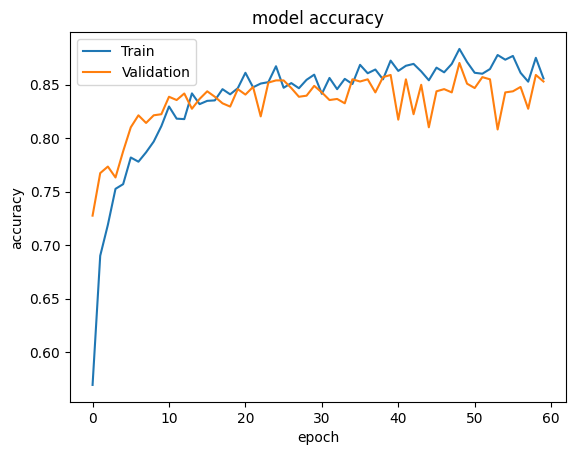

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resnet152v2_without_data_augmentation_accuracy.png")
plt.show()

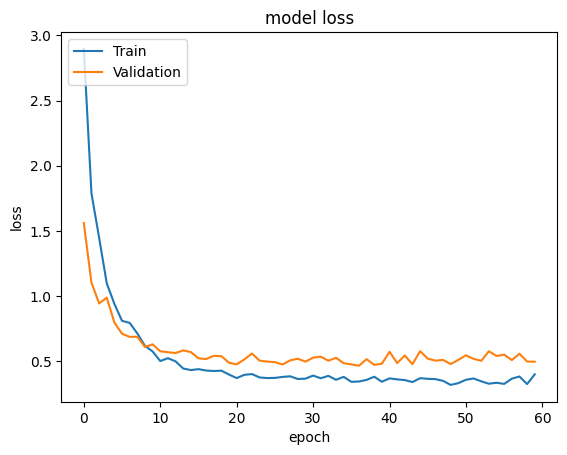

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resnet152v2_without_data_augmentation_loss.png")
plt.show()

In [28]:
model_2.save("resnet152v2_without_data_augumentation.h5")

In [29]:
del model_2

In [30]:
del resnet152v2

## InceptionResNetV2

In [31]:
inception_resnetv2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
    pooling="avg",
    classes=4,
)

In [32]:
for layer in inception_resnetv2.layers:
  layer.trainable = False

In [33]:
model_3 = tf.keras.models.Sequential()
model_3.add(inception_resnetv2)

model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dropout(0.4))
model_3.add(tf.keras.layers.Dense(128,activation="relu", kernel_initializer='he_uniform'))
model_3.add(tf.keras.layers.Dropout(0.4))
model_3.add(tf.keras.layers.Dense(4, activation="softmax"))

In [34]:
model_3.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [35]:
history = model_3.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 20
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 72s 566ms/step - accuracy: 0.4411 - loss: 2.1358 - val_accuracy: 0.7122 - val_loss: 0.8270
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6114 - loss: 0.9494 - val_accuracy: 0.7418 - val_loss: 0.7224
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.6670 - loss: 0.8264 - val_accuracy: 0.7735 - val_loss: 0.6537
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.6901 - loss: 0.7596 - val_accuracy: 0.7949 - val_loss: 0.6196
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.7017 - loss: 0.7529 - val_accuracy: 0.7847 - val_loss: 0.5753
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.7201 - loss: 0.6816 - val_accuracy: 0.7867 - val_loss: 0.5400
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.7675 - loss: 0.6257 - val_accuracy: 0.7949 - val_loss: 0.5375
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.7616 - loss: 0.6213 - val_accuracy: 0.7918 -

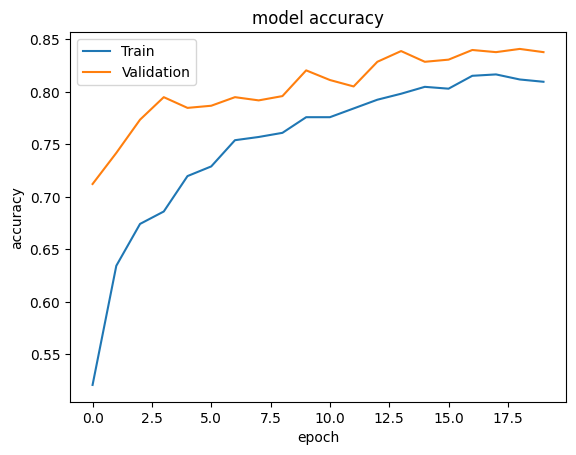

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("inception_resnet_v2_without_data_augmentation_accuracy.png")
plt.show()

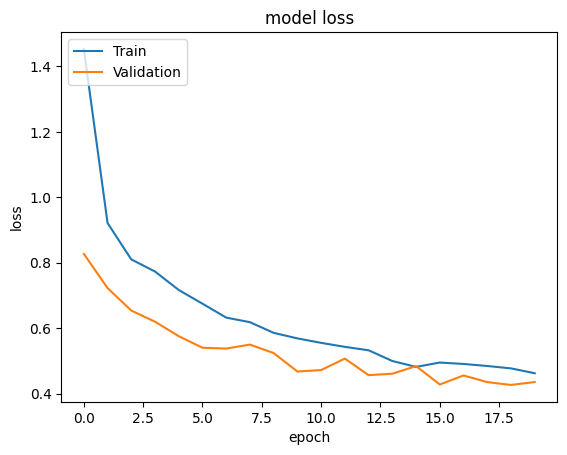

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("inception_resnet_v2_without_data_augmentation_loss.png")
plt.show()

In [38]:
model_3.save("inception_resnetv2_without_data_augmentation.h5")

In [39]:
del model_3
del inception_resnetv2

## Best Baseline model -> Resnet152V2

In [40]:
model = tf.keras.models.load_model("/content/resnet152v2_without_data_augumentation.h5")

In [41]:
model.evaluate(x_val, y_val)

31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.8567 - loss: 0.4779


[0.49795424938201904, 0.8530611991882324]

In [42]:
y_pred = model.predict(x_val)

31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 415ms/step


In [43]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val, axis=1)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       307
           1       0.74      0.85      0.79       265
           2       0.90      0.90      0.90       153
           3       0.90      0.91      0.90       255

    accuracy                           0.85       980
   macro avg       0.86      0.86      0.86       980
weighted avg       0.86      0.85      0.85       980



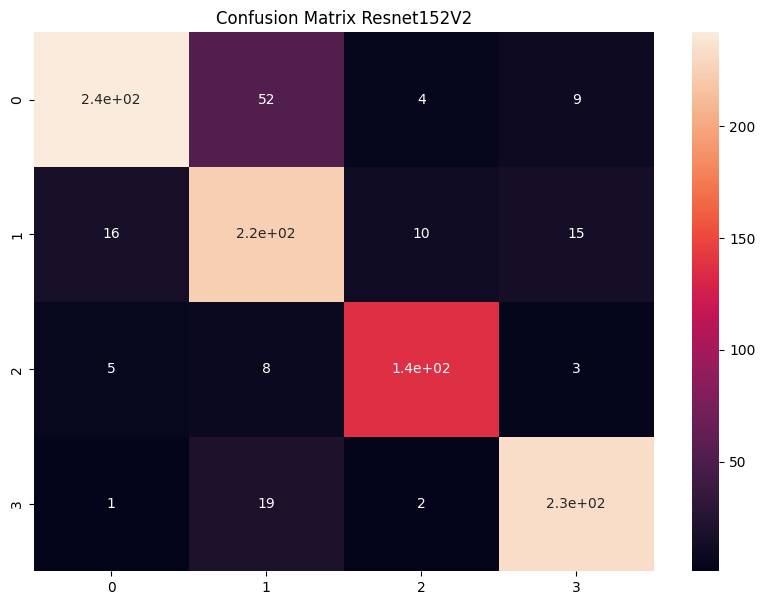

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Confusion Matrix Resnet152V2")
plt.savefig("resnet_152V2_confusion_matrix.png")
plt.show()

In [46]:
!pip install -q git+https://github.com/THU-MIG/yolov10

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [47]:
!wget -P -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt

--2026-02-14 18:05:28--  https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/THU-MIG/yolov10/releases/download/v1.0/yolov10n.pt [following]
--2026-02-14 18:05:28--  https://github.com/THU-MIG/yolov10/releases/download/v1.0/yolov10n.pt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/804788522/de01476f-8157-4901-921f-e0c6cb3848cf?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-14T18%3A59%3A13Z&rscd=attachment%3B+filename%3Dyolov10n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-02-14T17%3A58%3A50Z&ske=2026-02-14T18%3A59%3A13Z&sks=b&skv=2018-11-0

In [48]:
!pip install -q roboflow

In [49]:
pip install ultralytics==8.0.196

  Using cached ultralytics-8.0.196-py3-none-any.whl.metadata (31 kB)
Using cached ultralytics-8.0.196-py3-none-any.whl (631 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


In [50]:
from roboflow import Roboflow
rf = Roboflow(api_key = "iznFVnIPEdTik7NvjQuf")
project = rf.workspace("aabbcceeffgg").project("brain-tumor-detection-69d9s")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [51]:
!yolo task=detect mode=train epochs=25 batch=32 plots=True \
model='/content/-q/yolov10n.pt' \
data='/content/Brain-Tumor-Detection-2/data.yaml'


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
                   ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map

In [52]:
!pip install matplotlib-venn

In [53]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [54]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [55]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [56]:
!pip install cartopy
import cartopy

In [57]:
!find /content -name best.pt


In [58]:
!yolo detect train data=/content/Brain-Tumor-Detection-2/data.yaml \
                 model=yolov8n.pt \
                 epochs=100 \
                 imgsz=640 \
                 project=/content/runs/detect \
                 name=train2


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
                   ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map

In [59]:
!pip uninstall -y ultralytics torch torchvision torchaudio
!pip install ultralytics



Found existing installation: ultralytics 8.0.196
Uninstalling ultralytics-8.0.196:
  Successfully uninstalled ultralytics-8.0.196
Found existing installation: torch 2.10.0
Uninstalling torch-2.10.0:
  Successfully uninstalled torch-2.10.0
Found existing installation: torchvision 0.25.0
Uninstalling torchvision-0.25.0:
  Successfully uninstalled torchvision-0.25.0
  Using cached ultralytics-8.4.14-py3-none-any.whl.metadata (39 kB)
  Using cached torch-2.10.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (31 kB)
  Using cached torchvision-0.25.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (5.4 kB)
Using cached ultralytics-8.4.14-py3-none-any.whl (1.2 MB)
Using cached torch-2.10.0-cp312-cp312-manylinux_2_28_x86_64.whl (915.7 MB)
Using cached torchvision-0.25.0-cp312-cp312-manylinux_2_28_x86_64.whl (8.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai

In [60]:
from ultralytics import YOLO

model_path = "/content/yolov8n.pt"
model = YOLO(model_path)

result = model(source = "/content/Brain-Tumor-Detection-2/valid/images", conf = 0.25, save=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/45 /content/Brain-Tumor-Detection-2/valid/images/image-1-_jpg.rf.e32408f86edcd45b20c52ea8fe4af99c.jpg: 640x640 (no detections), 32.3ms
image 2/45 /content/Brain-Tumor-Detection-2/valid/images/image-10-_jpg.rf.4da45ea2557dae0132ed9b70a840dc60.jpg: 640x640 (no detections), 14.8ms
image 3/45 /content/Brain-Tumor-Detection-2/valid/images/image-100-_jpg.rf.1e4c339842157e3a71ecab7090b05803.jpg: 640x640 1 cake, 55.7ms
image 4/45 /content/Brain-Tumor-Detection-2/valid/images/image-21-_jpg.rf.ecd60420f1e450492d1e219b674276ba.jpg: 640x640 1 dog, 18.1ms
image 5/45 /content/Brain-Tumor-Detection-2/valid/images/image-22-_jpg.rf.169cc3c475ec732326b6bedcb0116170.jpg: 640x640 (no detecti

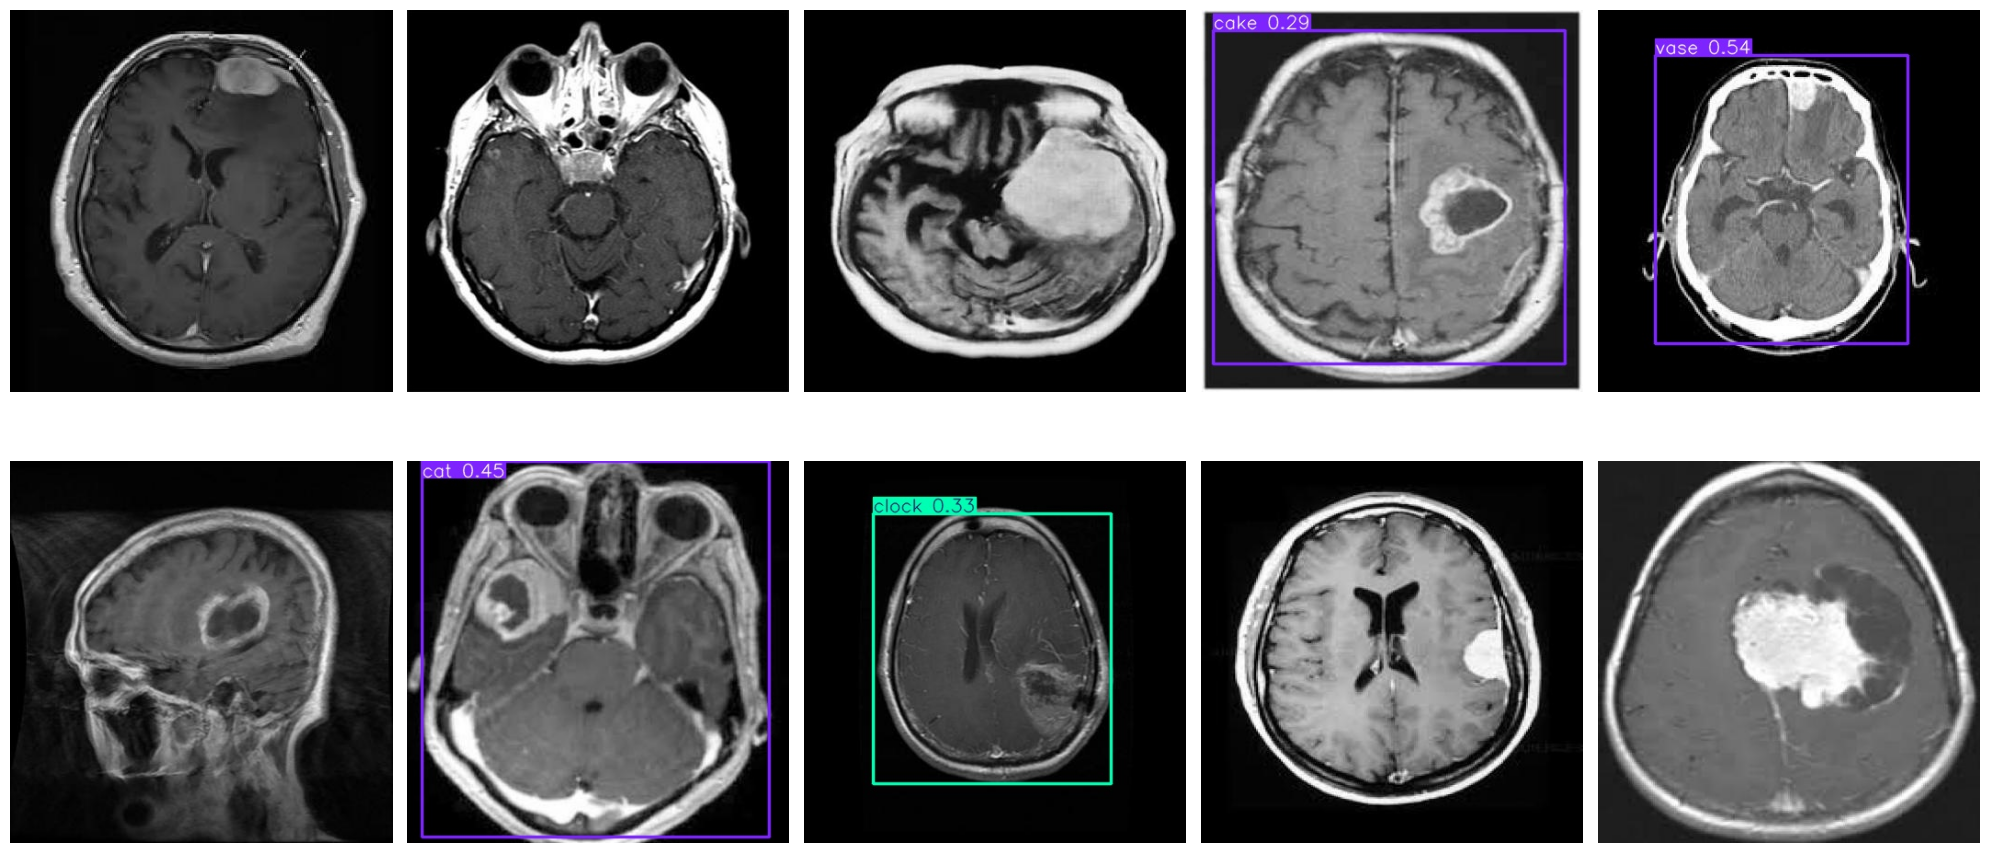

In [61]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob("/content/runs/detect/predict/*.jpg")

images_to_display = images[:10]

fig, axes = plt.subplots(2,5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
  if i < len(images_to_display):
    img = mpimg.imread(images_to_display[i])
    ax.imshow(img)
    ax.axis('off')
  else:
    ax.axis('off')
plt.tight_layout()
plt.show()


image 1/1 /content/Brain-Tumor-Detection-2/valid/images/image-21-_jpg.rf.ecd60420f1e450492d1e219b674276ba.jpg: 640x640 1 dog, 9.9ms
Speed: 3.4ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
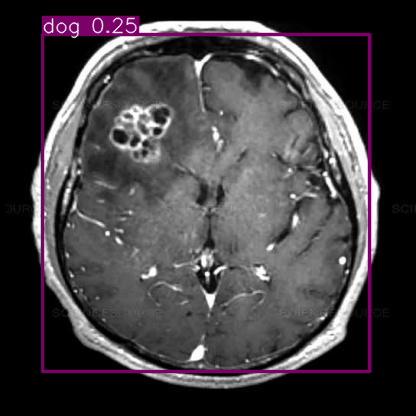

In [62]:
result = model.predict(source = "/content/Brain-Tumor-Detection-2/valid/images/image-21-_jpg.rf.ecd60420f1e450492d1e219b674276ba.jpg", imgsz = 640, conf = 0.25)
annotated_img = result[0].plot()
annotated_img[:, :, ::-1]